In [1]:
from LightMEF import LightMEF

In [2]:
analysis = LightMEF("Region_US48.xlsx")
data = analysis.load_and_clean_data(start_date='2019-01-01', end_date='2025-12-31')

📂 Loading data...
✅ Data loaded: 61368 observations from 2019-01-01 to 2025-12-31


In [3]:
# 3. Create Time Features
analysis.create_time_variables()

🕐 Creating time variables (Season, Month, Day)...
✅ Time variables created


Region            UTC time Local date  Local_Hour          Local time  \
30715   US48 2019-01-01 00:00:00 2018-12-31          19 2018-12-31 19:00:00   
30716   US48 2019-01-01 01:00:00 2018-12-31          20 2018-12-31 20:00:00   
30717   US48 2019-01-01 02:00:00 2018-12-31          21 2018-12-31 21:00:00   
30718   US48 2019-01-01 03:00:00 2018-12-31          22 2018-12-31 22:00:00   
30719   US48 2019-01-01 04:00:00 2018-12-31          23 2018-12-31 23:00:00   
...      ...                 ...        ...         ...                 ...   
92078   US48 2025-12-31 19:00:00 2025-12-31          14 2025-12-31 14:00:00   
92079   US48 2025-12-31 20:00:00 2025-12-31          15 2025-12-31 15:00:00   
92080   US48 2025-12-31 21:00:00 2025-12-31          16 2025-12-31 16:00:00   
92081   US48 2025-12-31 22:00:00 2025-12-31          17 2025-12-31 17:00:00   
92082   US48 2025-12-31 23:00:00 2025-12-31          18 2025-12-31 18:00:00   

      Time zone  Demand forecast         D        NG  Total interchange  ...  \
30715   Eastern           474754  461392.0  443760.0            -1706.0  ...   
30716   Eastern           477012  459577.0  443439.0            -2413.0  ...   
30717   Eastern           472897  451601.0  433541.0            -2375.0  ...   
30718   Eastern           459428  437803.0  419382.0             -816.0  ...   
30719   Eastern           439314  422742.0  406525.0            -1224.0  ...   
...         ...              ...       ...       ...                ...  ...   
92078   Eastern           506723  507946.0  505349.0            -3218.0  ...   
92079   Eastern           501646  502367.0  499280.0            -2665.0  ...   
92080   Eastern           502500  498110.0  494410.0            -3748.0  ...   
92081   Eastern           510873  503223.0  498332.0            -4100.0  ...   
92082   Eastern           522578  515880.0  512047.0            -4191.0  ...   

       hourly_emissions_mlb  hourly_generation_mkwh  \
30715            364.694790                 442.471   
30716            361.547177                 442.123   
30717            346.303369                 432.412   
30718            327.104588                 418.225   
30719            311.432415                 405.489   
...                     ...                     ...   
92078            375.250294                 504.684   
92079            362.819728                 499.150   
92080            357.368942                 494.459   
92081            367.588036                 497.863   
92082            399.155231                 511.346   

       hourly_generation_renewables_mkwh  \
30715                            202.493   
30716                            203.516   
30717                            203.985   
30718                            203.813   
30719                            203.129   
...                                  ...   
92078                            239.645   
92079                            240.544   
92080                            236.810   
92081                            230.274   
92082                            218.012   

       hourly_generation_nonrenewables_mkwh      T  month  year        day  \
30715                               239.978      1      1  2019    Tuesday   
30716                               238.607      2      1  2019    Tuesday   
30717                               228.427      3      1  2019    Tuesday   
30718                               214.412      4      1  2019    Tuesday   
30719                               202.360      5      1  2019    Tuesday   
...                                     ...    ...    ...   ...        ...   
92078                               264.521  61364     12  2025  Wednesday   
92079                               257.964  61365     12  2025  Wednesday   
92080                               256.655  61366     12  2025  Wednesday   
92081                               266.654  61367     12  2025  Wednesday   
92082                               292.714  613

In [4]:
# 4. Detrend (Dummy Variable Method)
data = analysis.dummy_variable_seasonality_extraction()


🔧 Extracting seasonality using Dummy Variables...
   -> Fitting OLS for Emissions...
                             OLS Regression Results                             
Dep. Variable:     hourly_emissions_mlb   R-squared:                       0.809
Model:                              OLS   Adj. R-squared:                  0.808
Method:                   Least Squares   F-statistic:                     707.8
Date:                  Thu, 26 Feb 2026   Prob (F-statistic):               0.00
Time:                          10:29:37   Log-Likelihood:            -3.1268e+05
No. Observations:                 61368   AIC:                         6.261e+05
Df Residuals:                     61001   BIC:                         6.294e+05
Df Model:                           366                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---

In [5]:
#analysis.test_optimal_selection()

In [6]:
#analysis.freq_state()

In [7]:
# 5. Fit Model & Assign Regimes
ms_results = analysis.fit_msm_full_series(dummy=False)
ms_data = analysis.assign_regimes_to_data()


🔄 Fitting Markov Switching Model...
[ 9.93713026e-01  1.87295221e-02  5.14210066e-03  1.32990780e-02
 -4.40030605e-03  2.52204621e-04  8.88022131e-01  1.01709998e+00
  1.45885770e-03  9.81545707e-01  9.63893947e-01]
✅ MSM Fitted. High MEF Regime is: 1
                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                61367
Model:             MarkovAutoregression   Log Likelihood              111455.346
Date:                  Thu, 26 Feb 2026   AIC                        -222888.692
Time:                          10:32:27   BIC                        -222789.422
Sample:                               0   HQIC                       -222857.890
                                - 61367                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coe

In [8]:
# import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import pandas as pd
# y =data['hourly_emissions_detrended']
# x = data['hourly_generation_nonrenewables_detrended']
# # Scale variables
# scaler_y = StandardScaler()
# scaler_x = StandardScaler()
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()
# x_scaled = scaler_x.fit_transform(x.values.reshape(-1, 1)).flatten()
# mod = sm.tsa.MarkovAutoregression(
#             endog=y_scaled,
#             exog=x_scaled,
#             k_regimes=3,
#             order=1,
#             trend='c',
#             switching_trend=True,
#             switching_exog=True,
#             switching_variance=False
#         )
# res = mod.fit()
# print(res.summary())
# print(dir(res))
# p=res.params
# print(p[4],p[5])
# h_prob = res.smoothed_marginal_probabilities


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


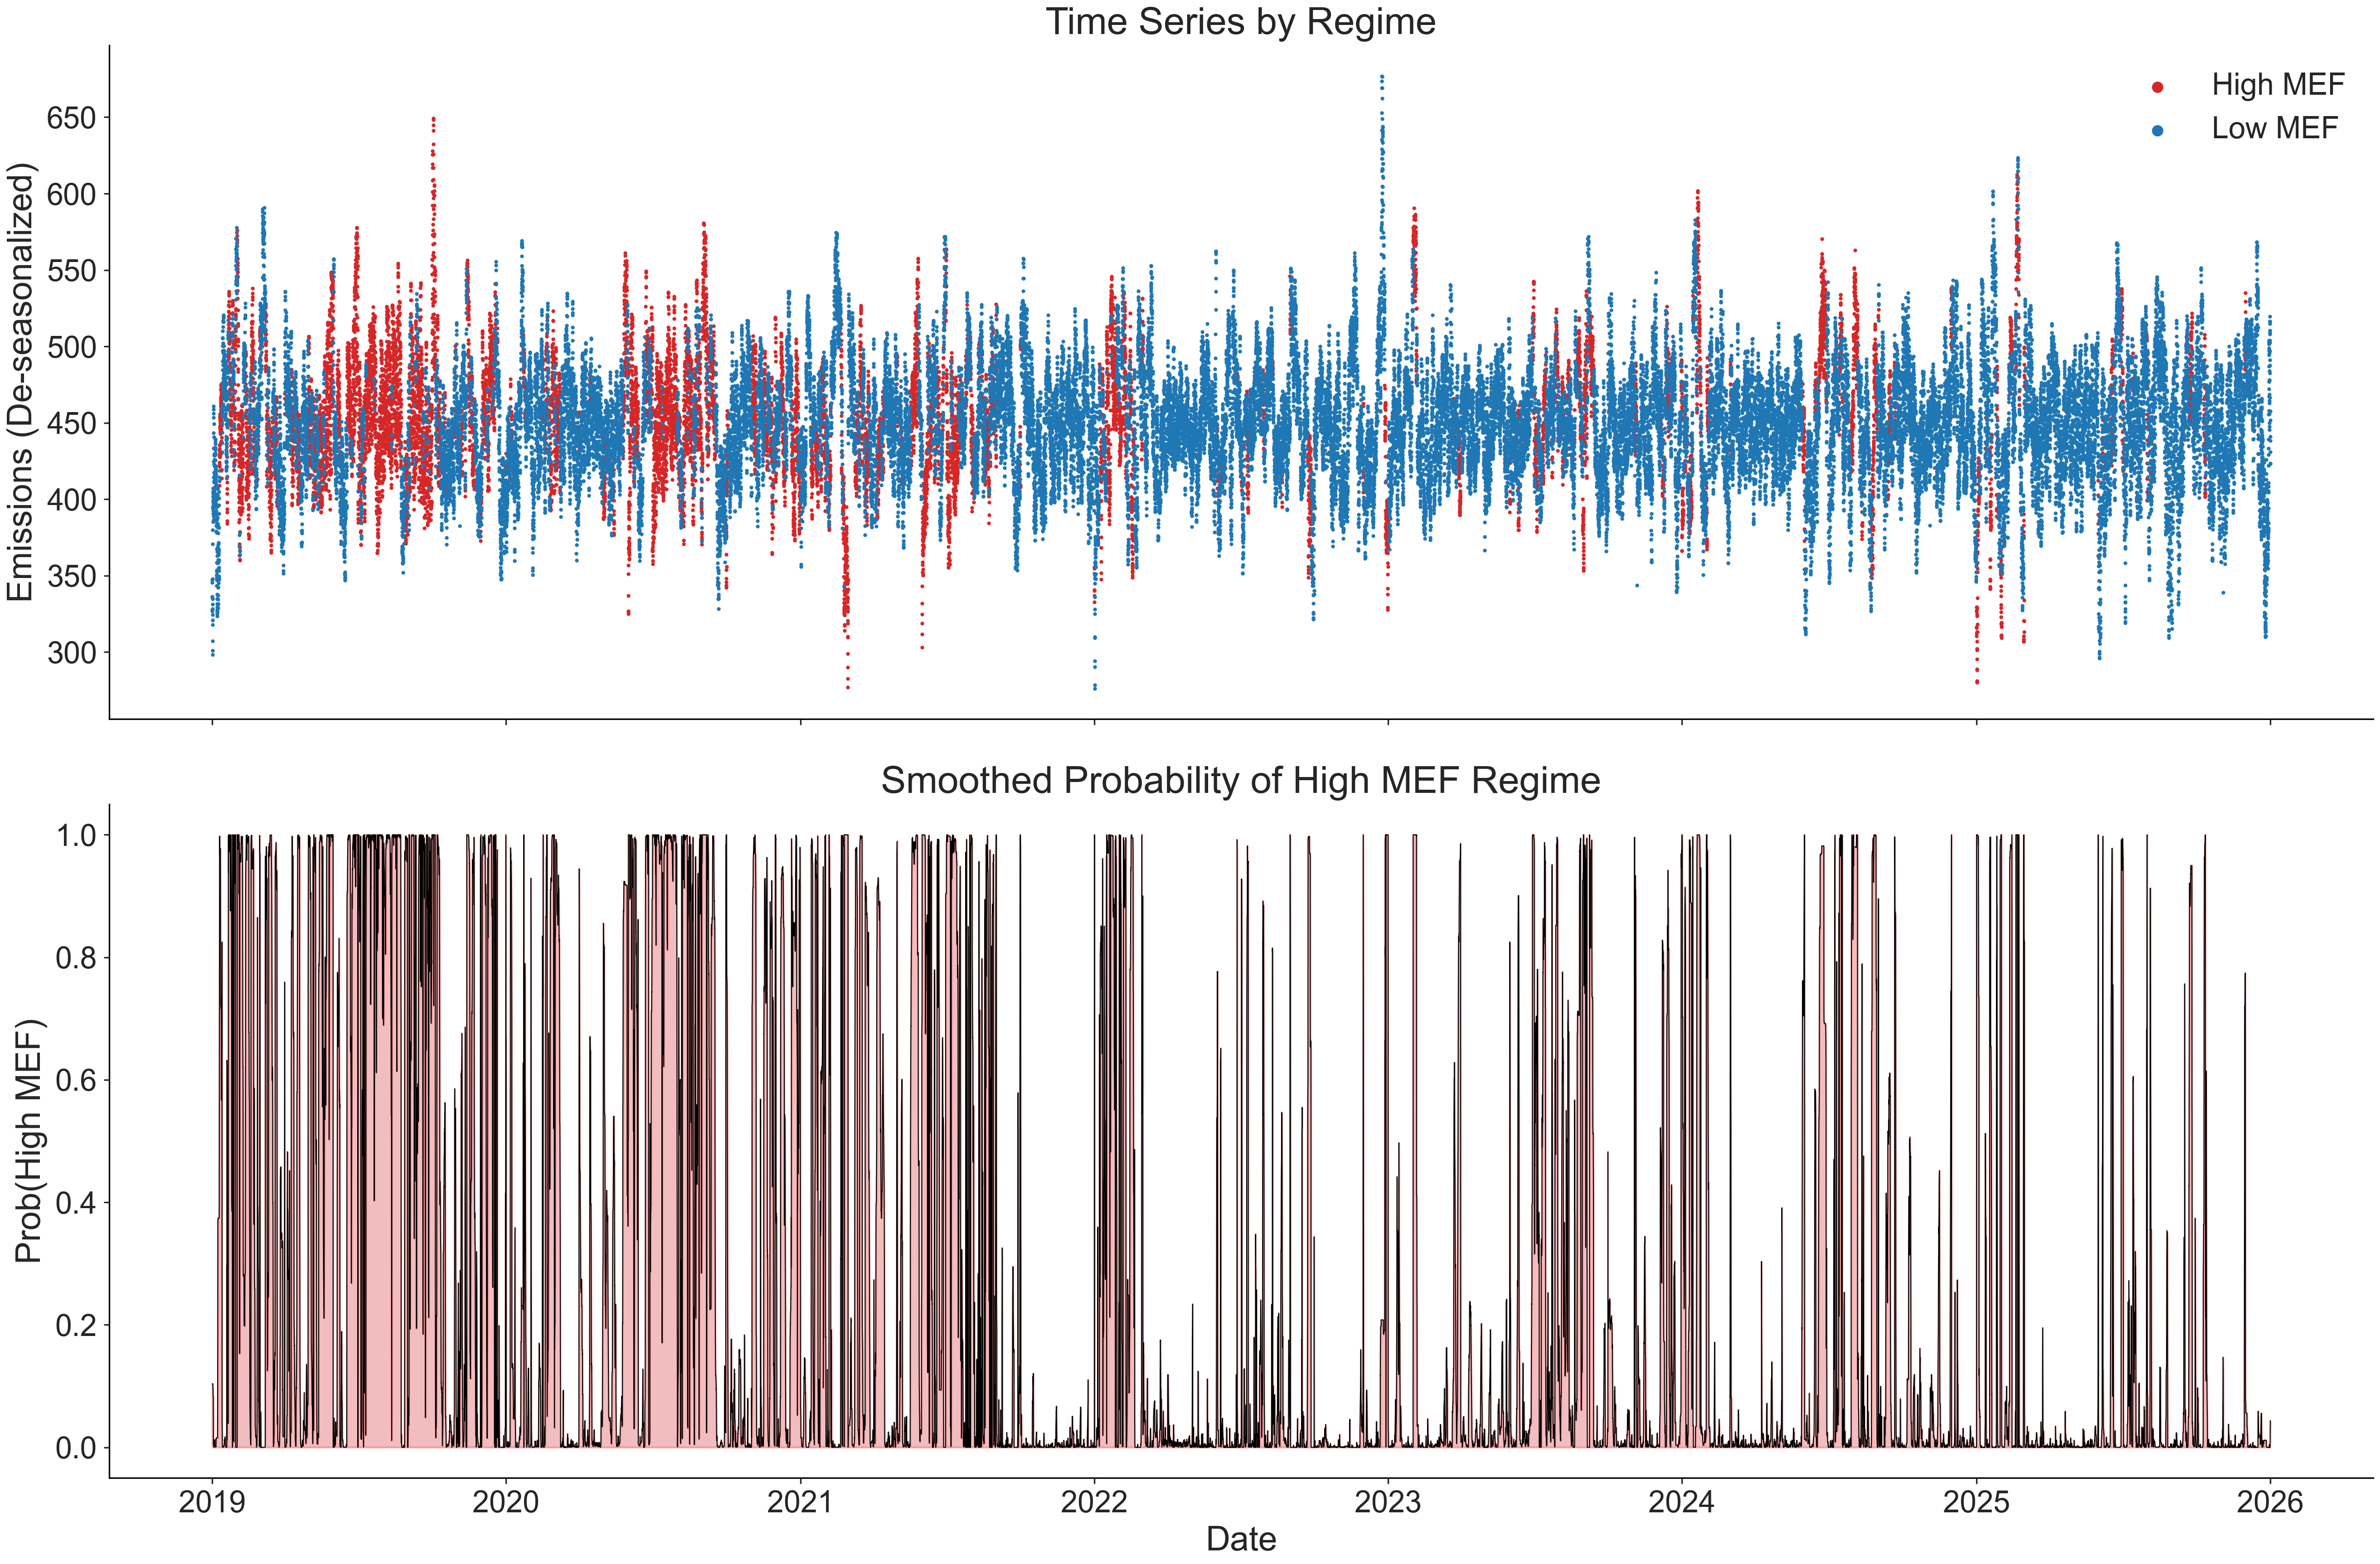

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


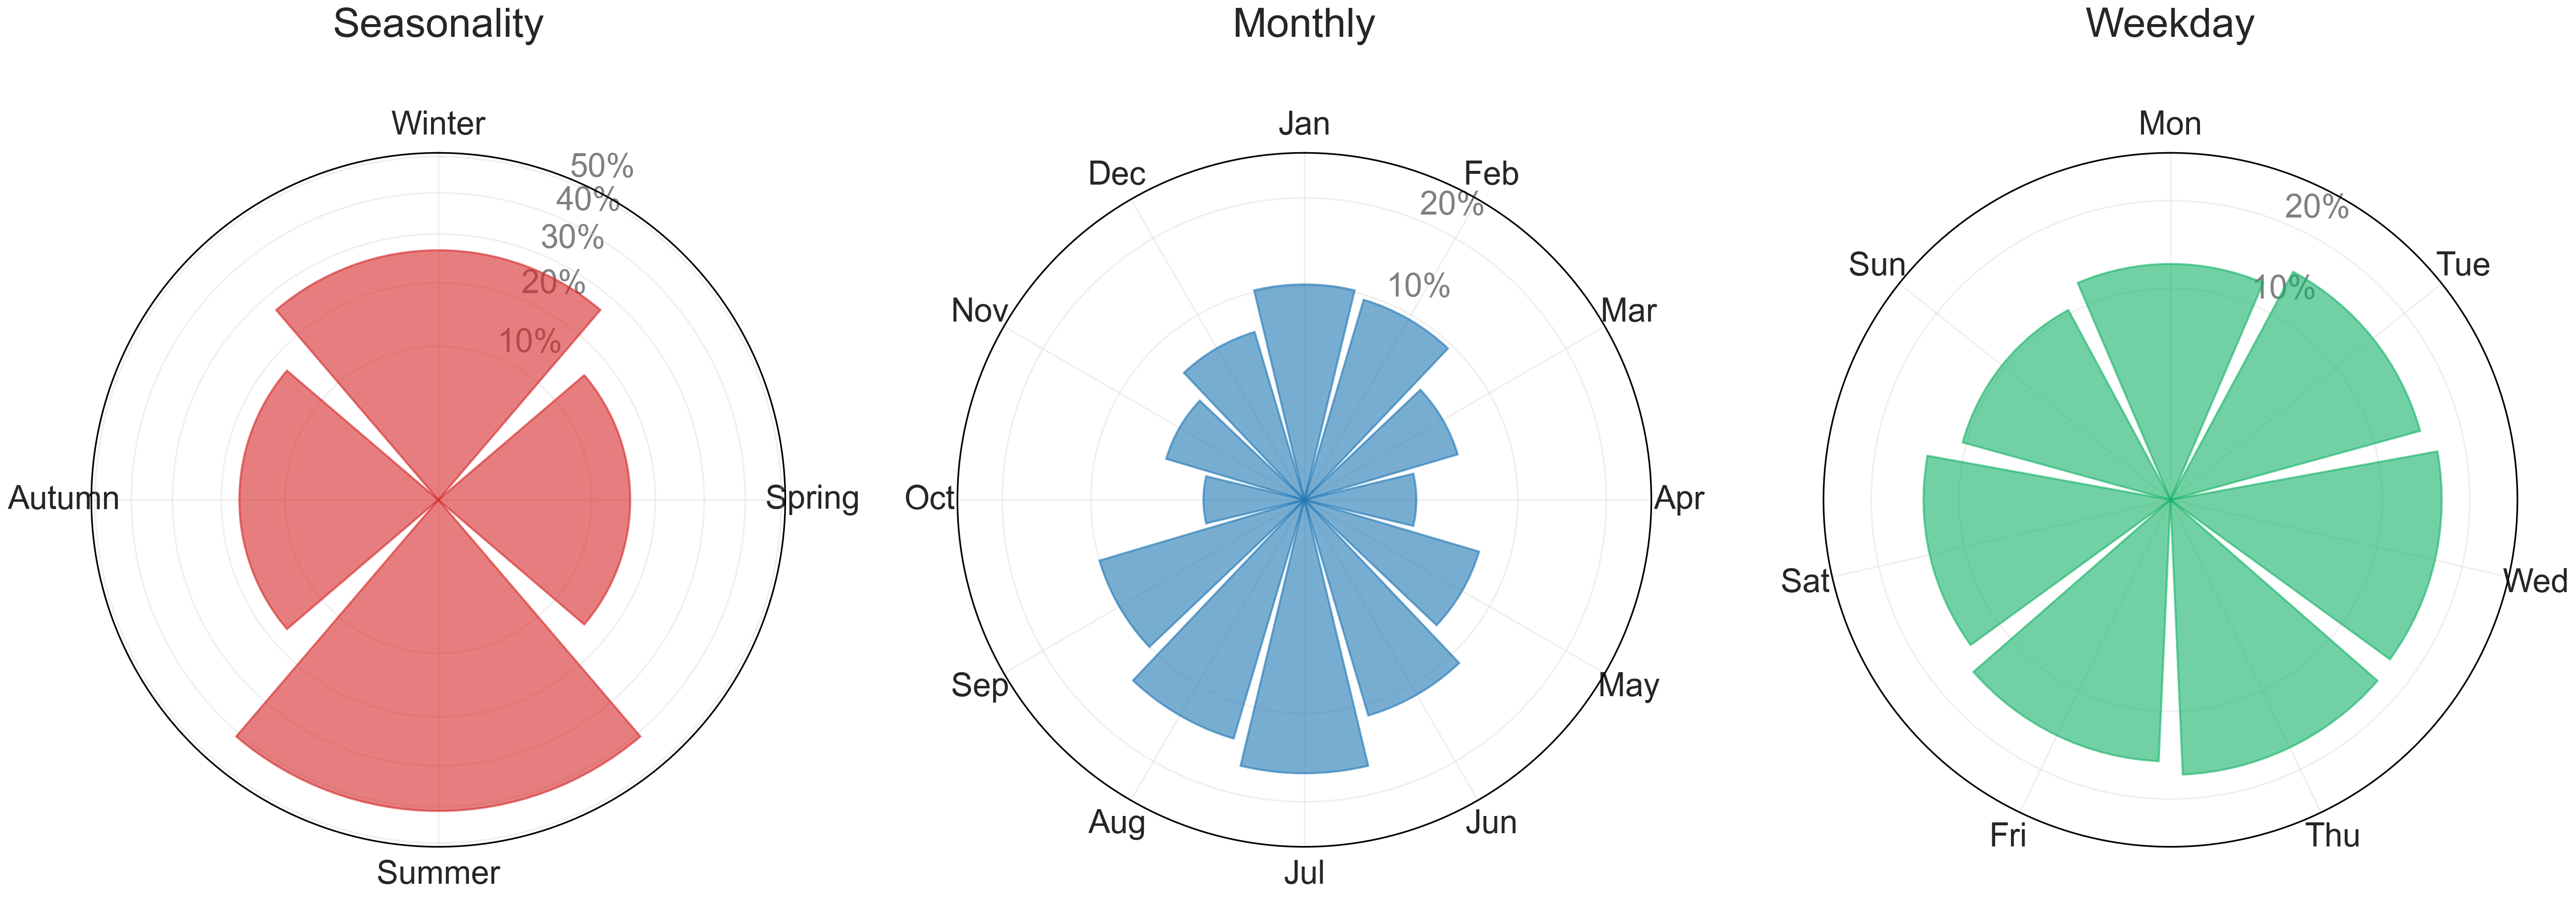

In [9]:
# 6. Plots

analysis.plot_regime_time_series()
analysis.plot_regime_polar_charts()


📈 MARGINAL FUEL PROBABILITY ANALYSIS (Slope of Gen vs Load)
------------------------------------------------------------
          Coal_Beta   Coal_R2  Gas_Beta    Gas_R2
Regime                                           
Low MEF    0.187550  0.730904  0.521752  0.787174
High MEF   0.244803  0.816047  0.514325  0.895847
------------------------------------------------------------


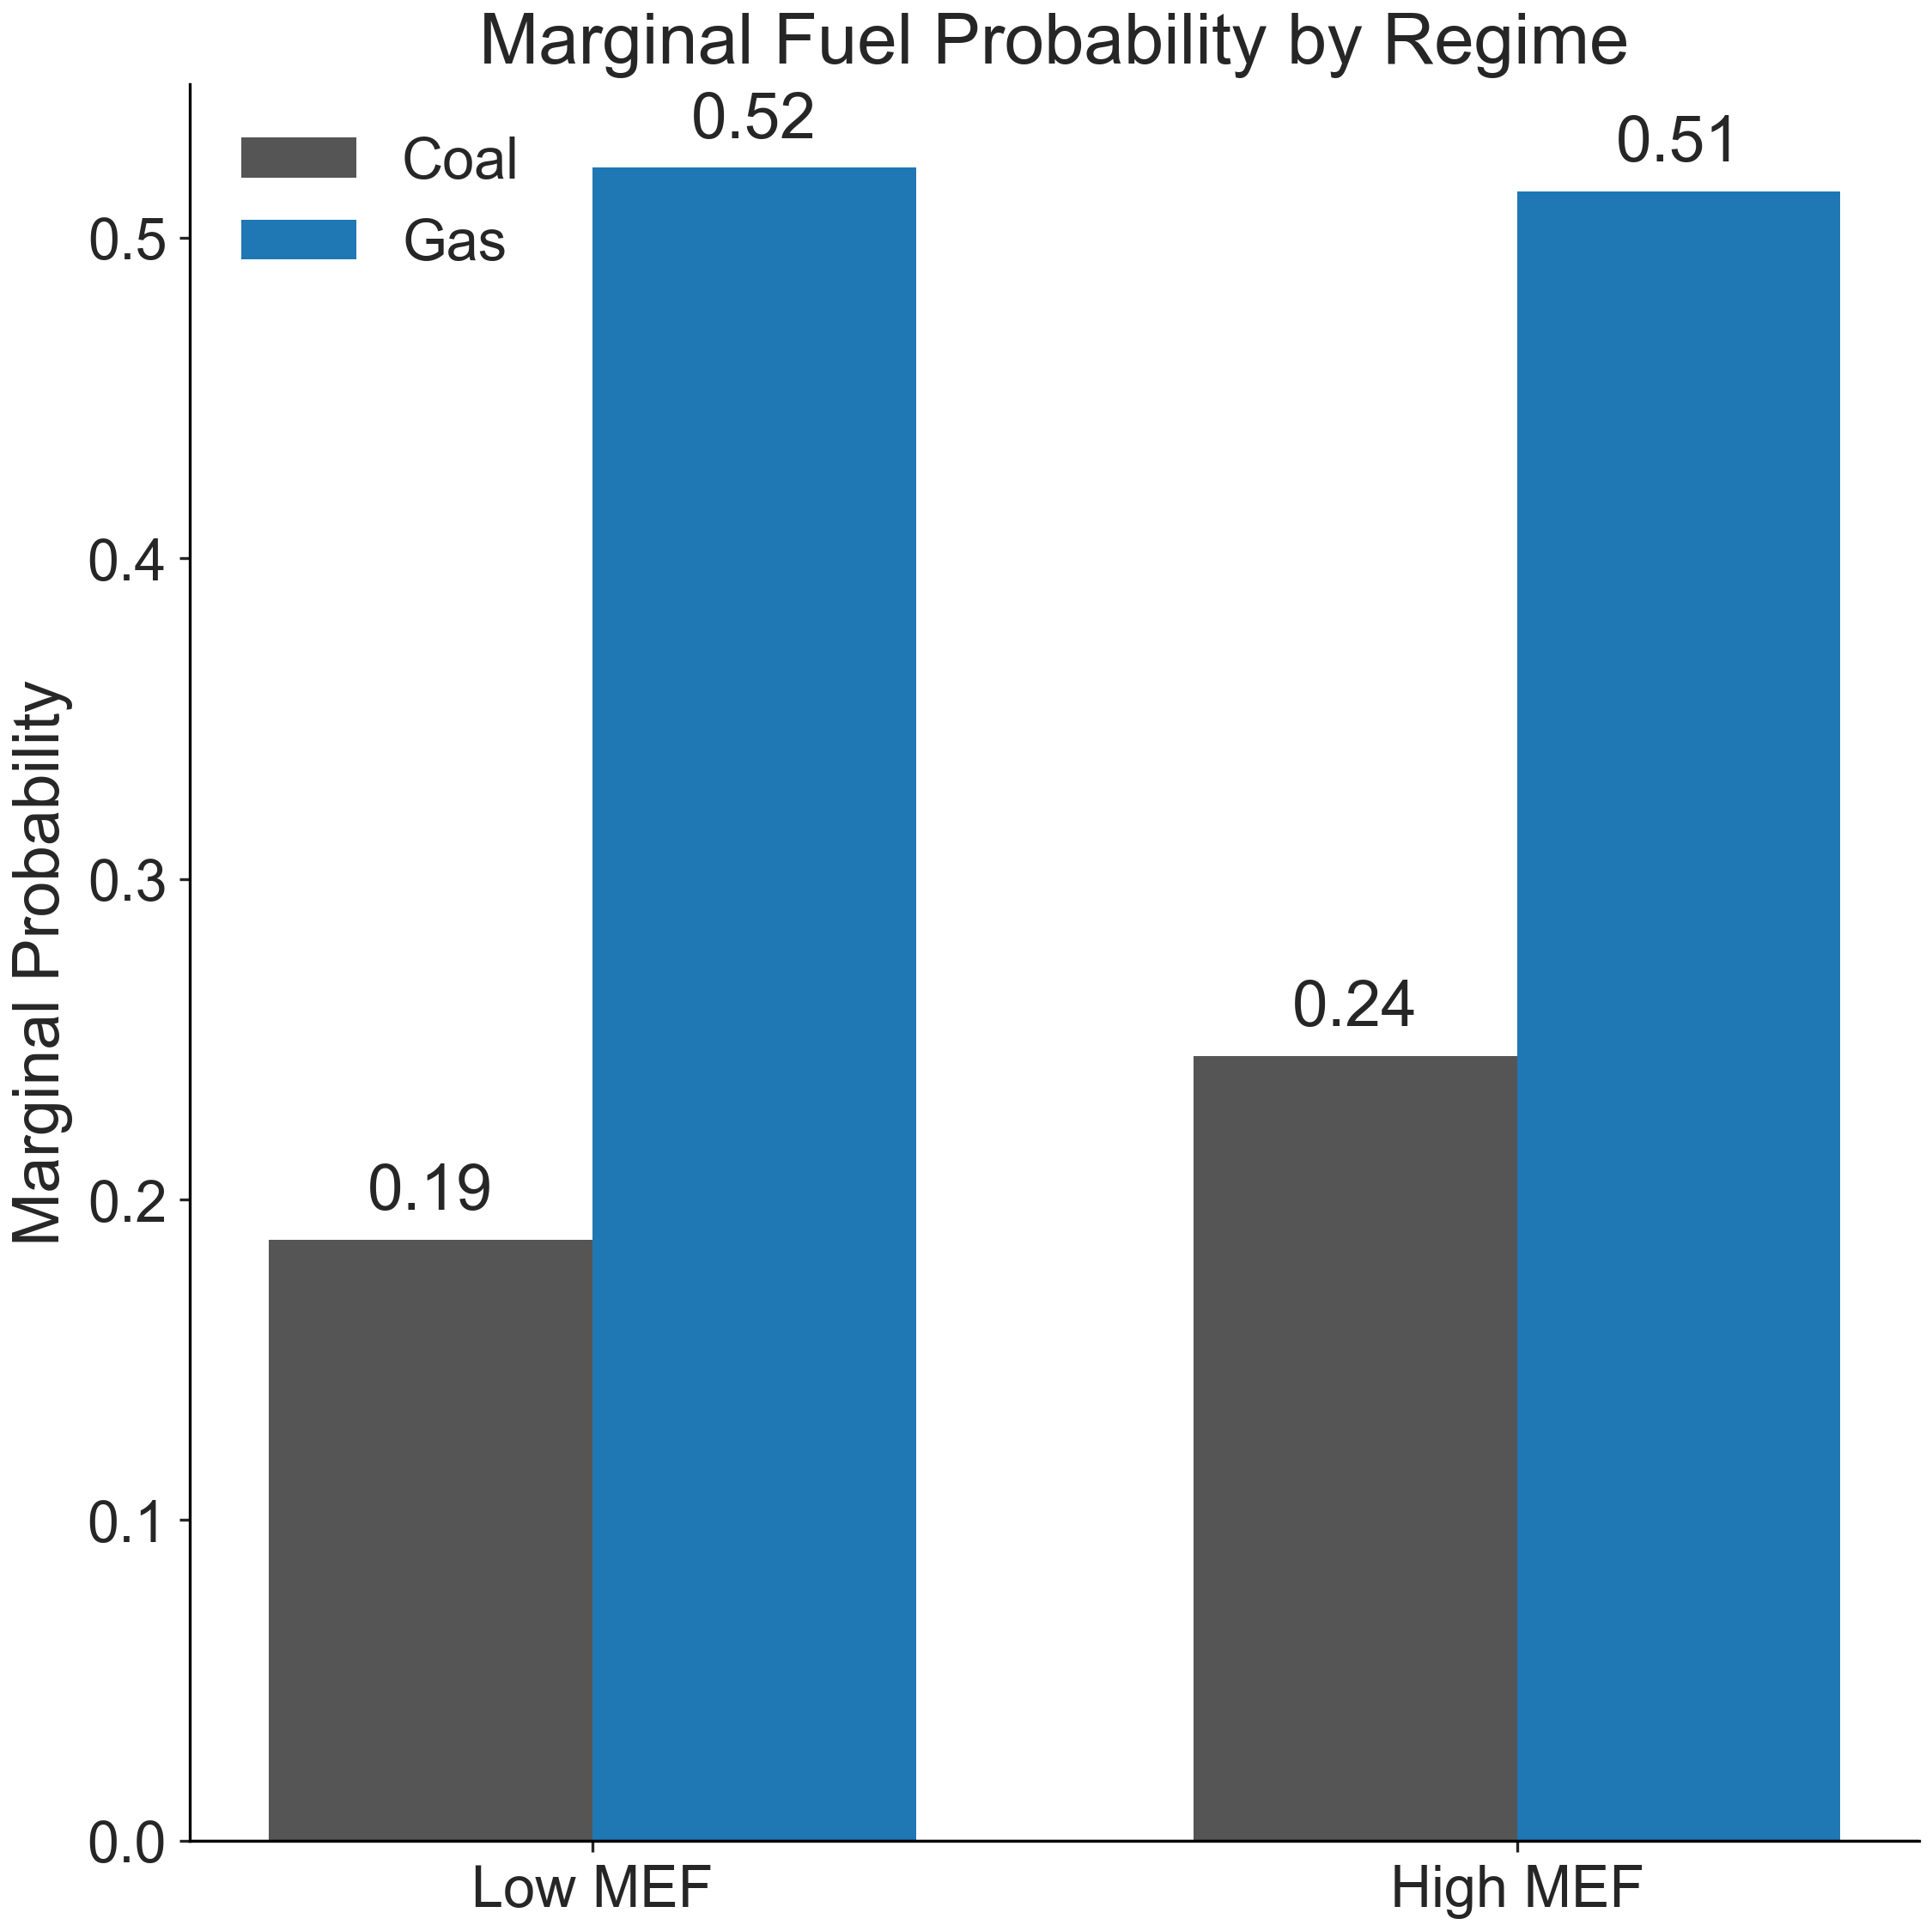

In [10]:
analysis.analyze_marginal_fuel_probability()

In [11]:
ms_results = analysis.fit_msm_full_series(dummy=True)
ms_data = analysis.assign_regimes_to_data()


🔄 Fitting Markov Switching Model...
[ 0.98410049  0.00936892  0.01961143 -0.00729383 -0.01053919 -0.01110866
  1.0300674   0.8999506   0.02068442  0.00573801 -0.07115632 -0.03999644
  0.00144432  0.96967598  0.98089746]
✅ MSM Fitted. High MEF Regime is: 0
                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                61367
Model:             MarkovAutoregression   Log Likelihood              111610.564
Date:                  Thu, 26 Feb 2026   AIC                        -223191.128
Time:                          10:36:32   BIC                        -223055.759
Sample:                               0   HQIC                       -223149.124
                                - 61367                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


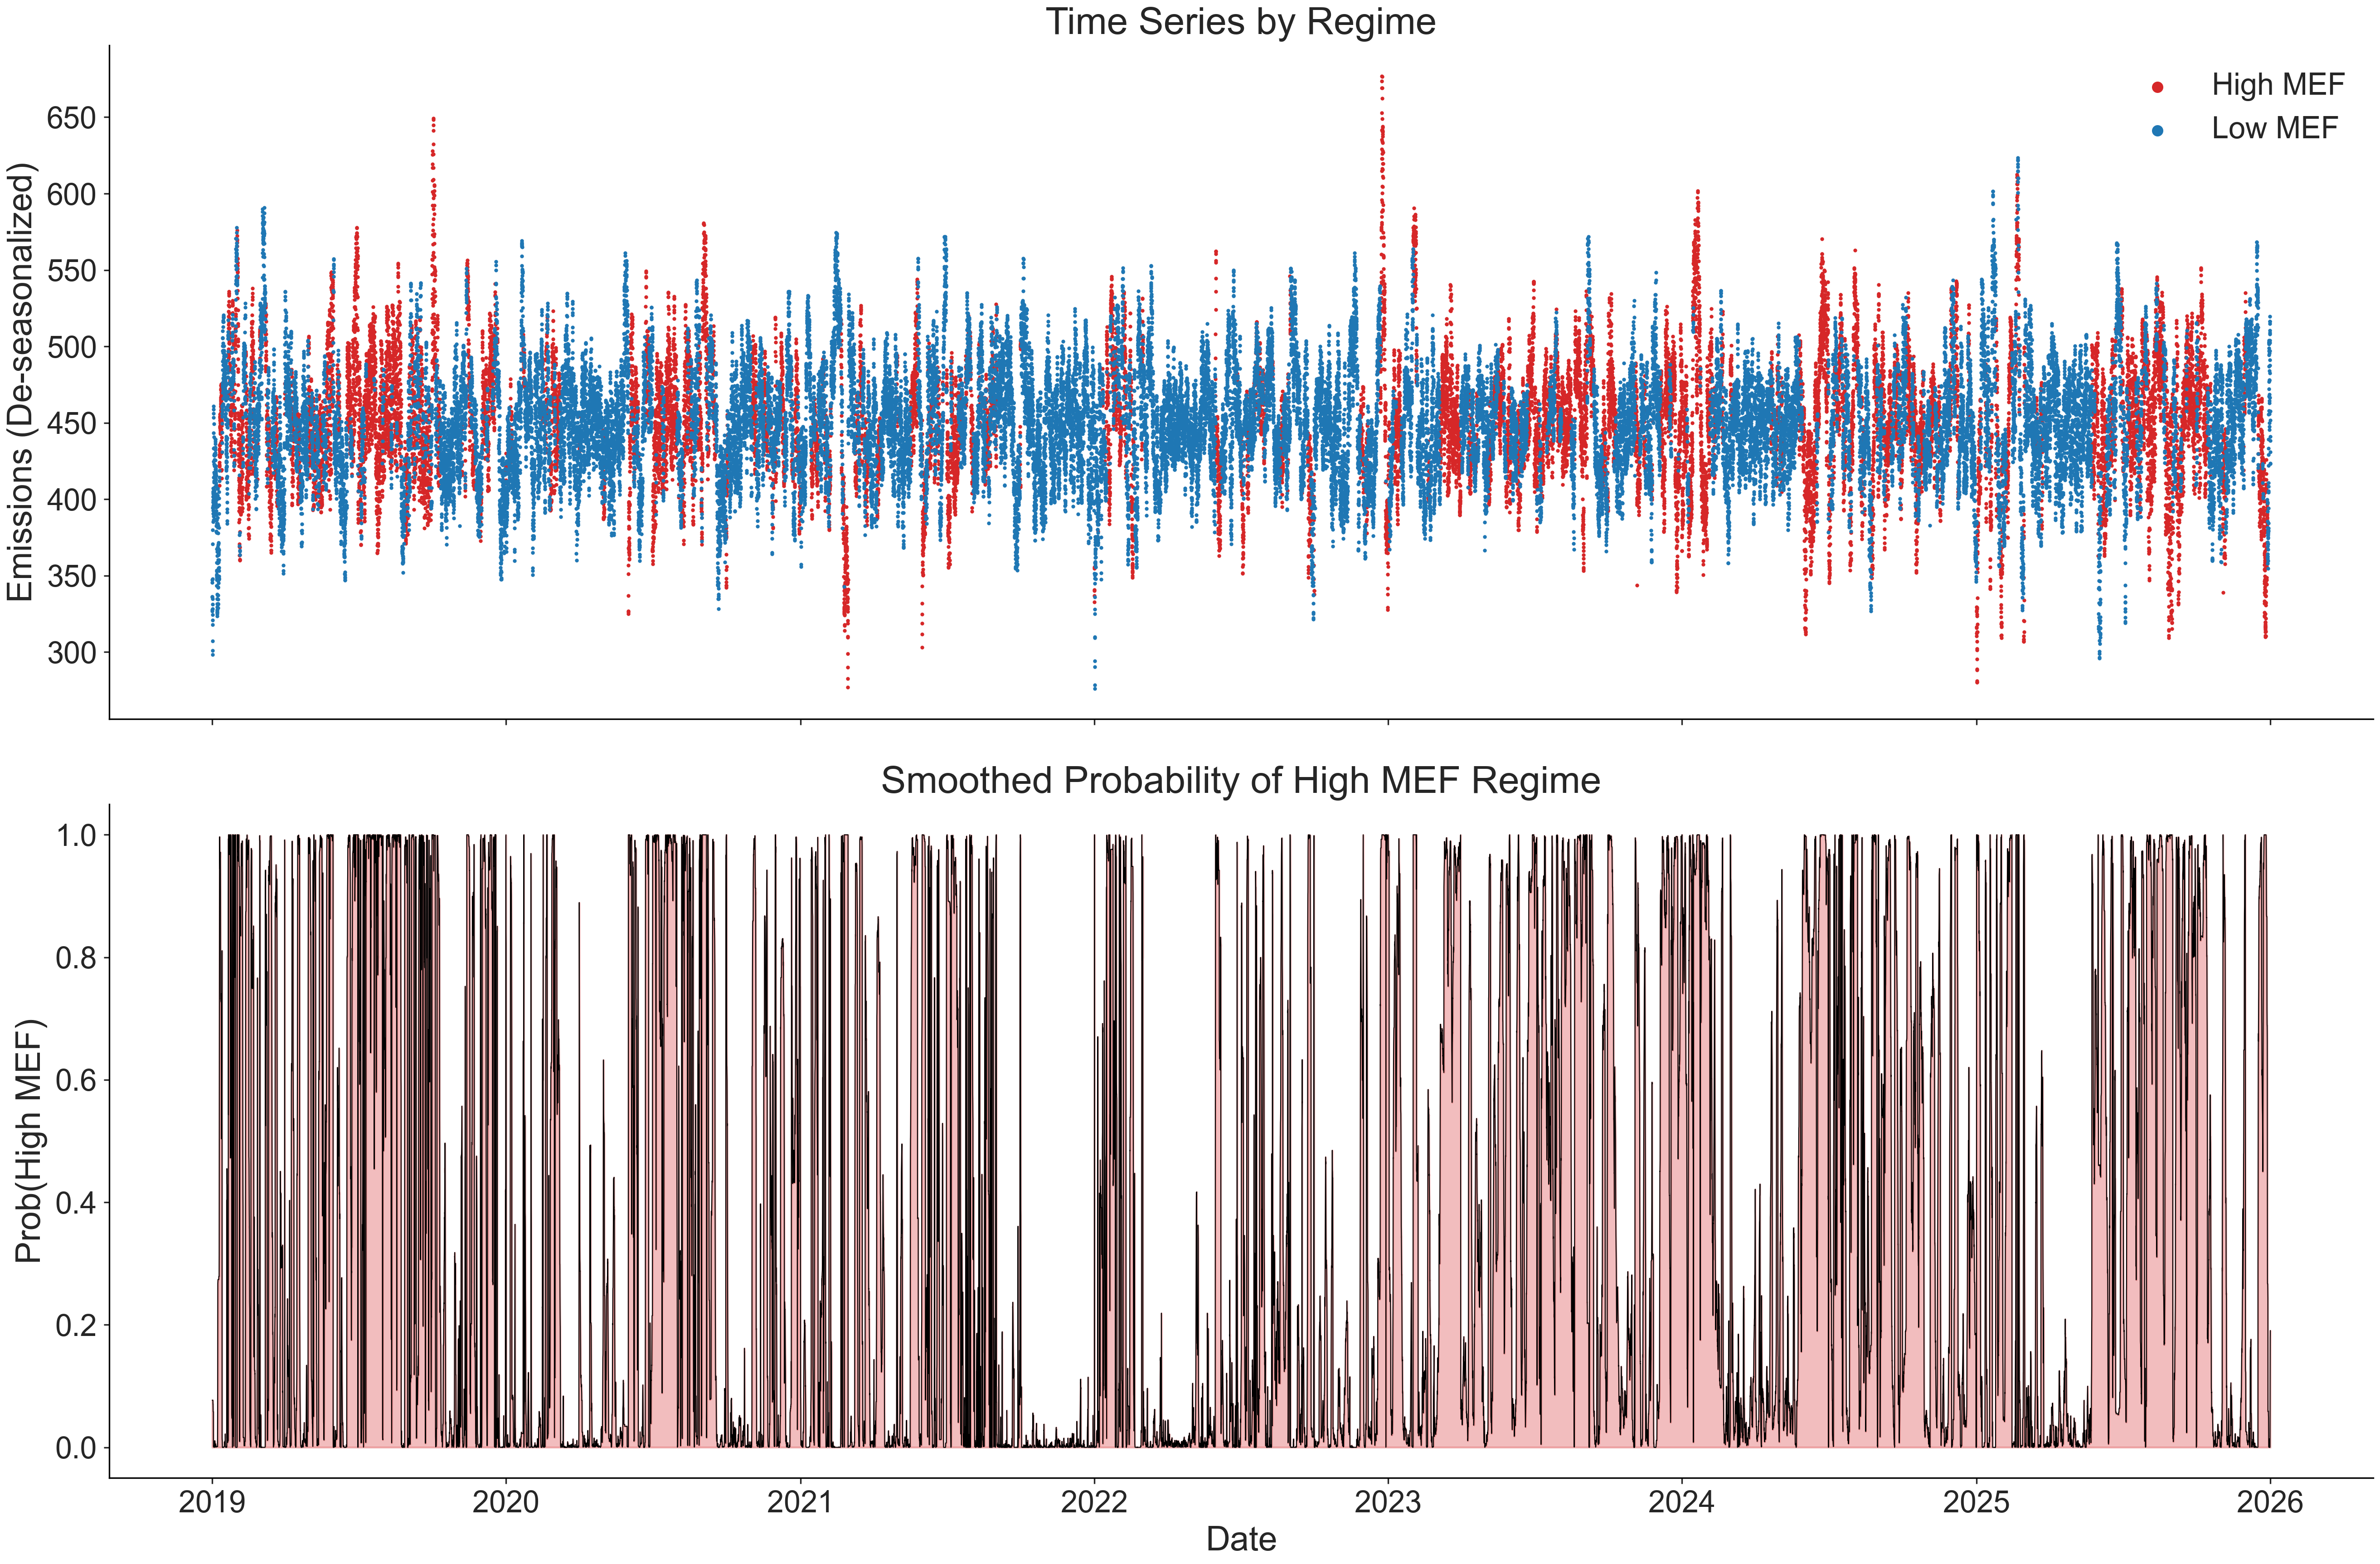

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


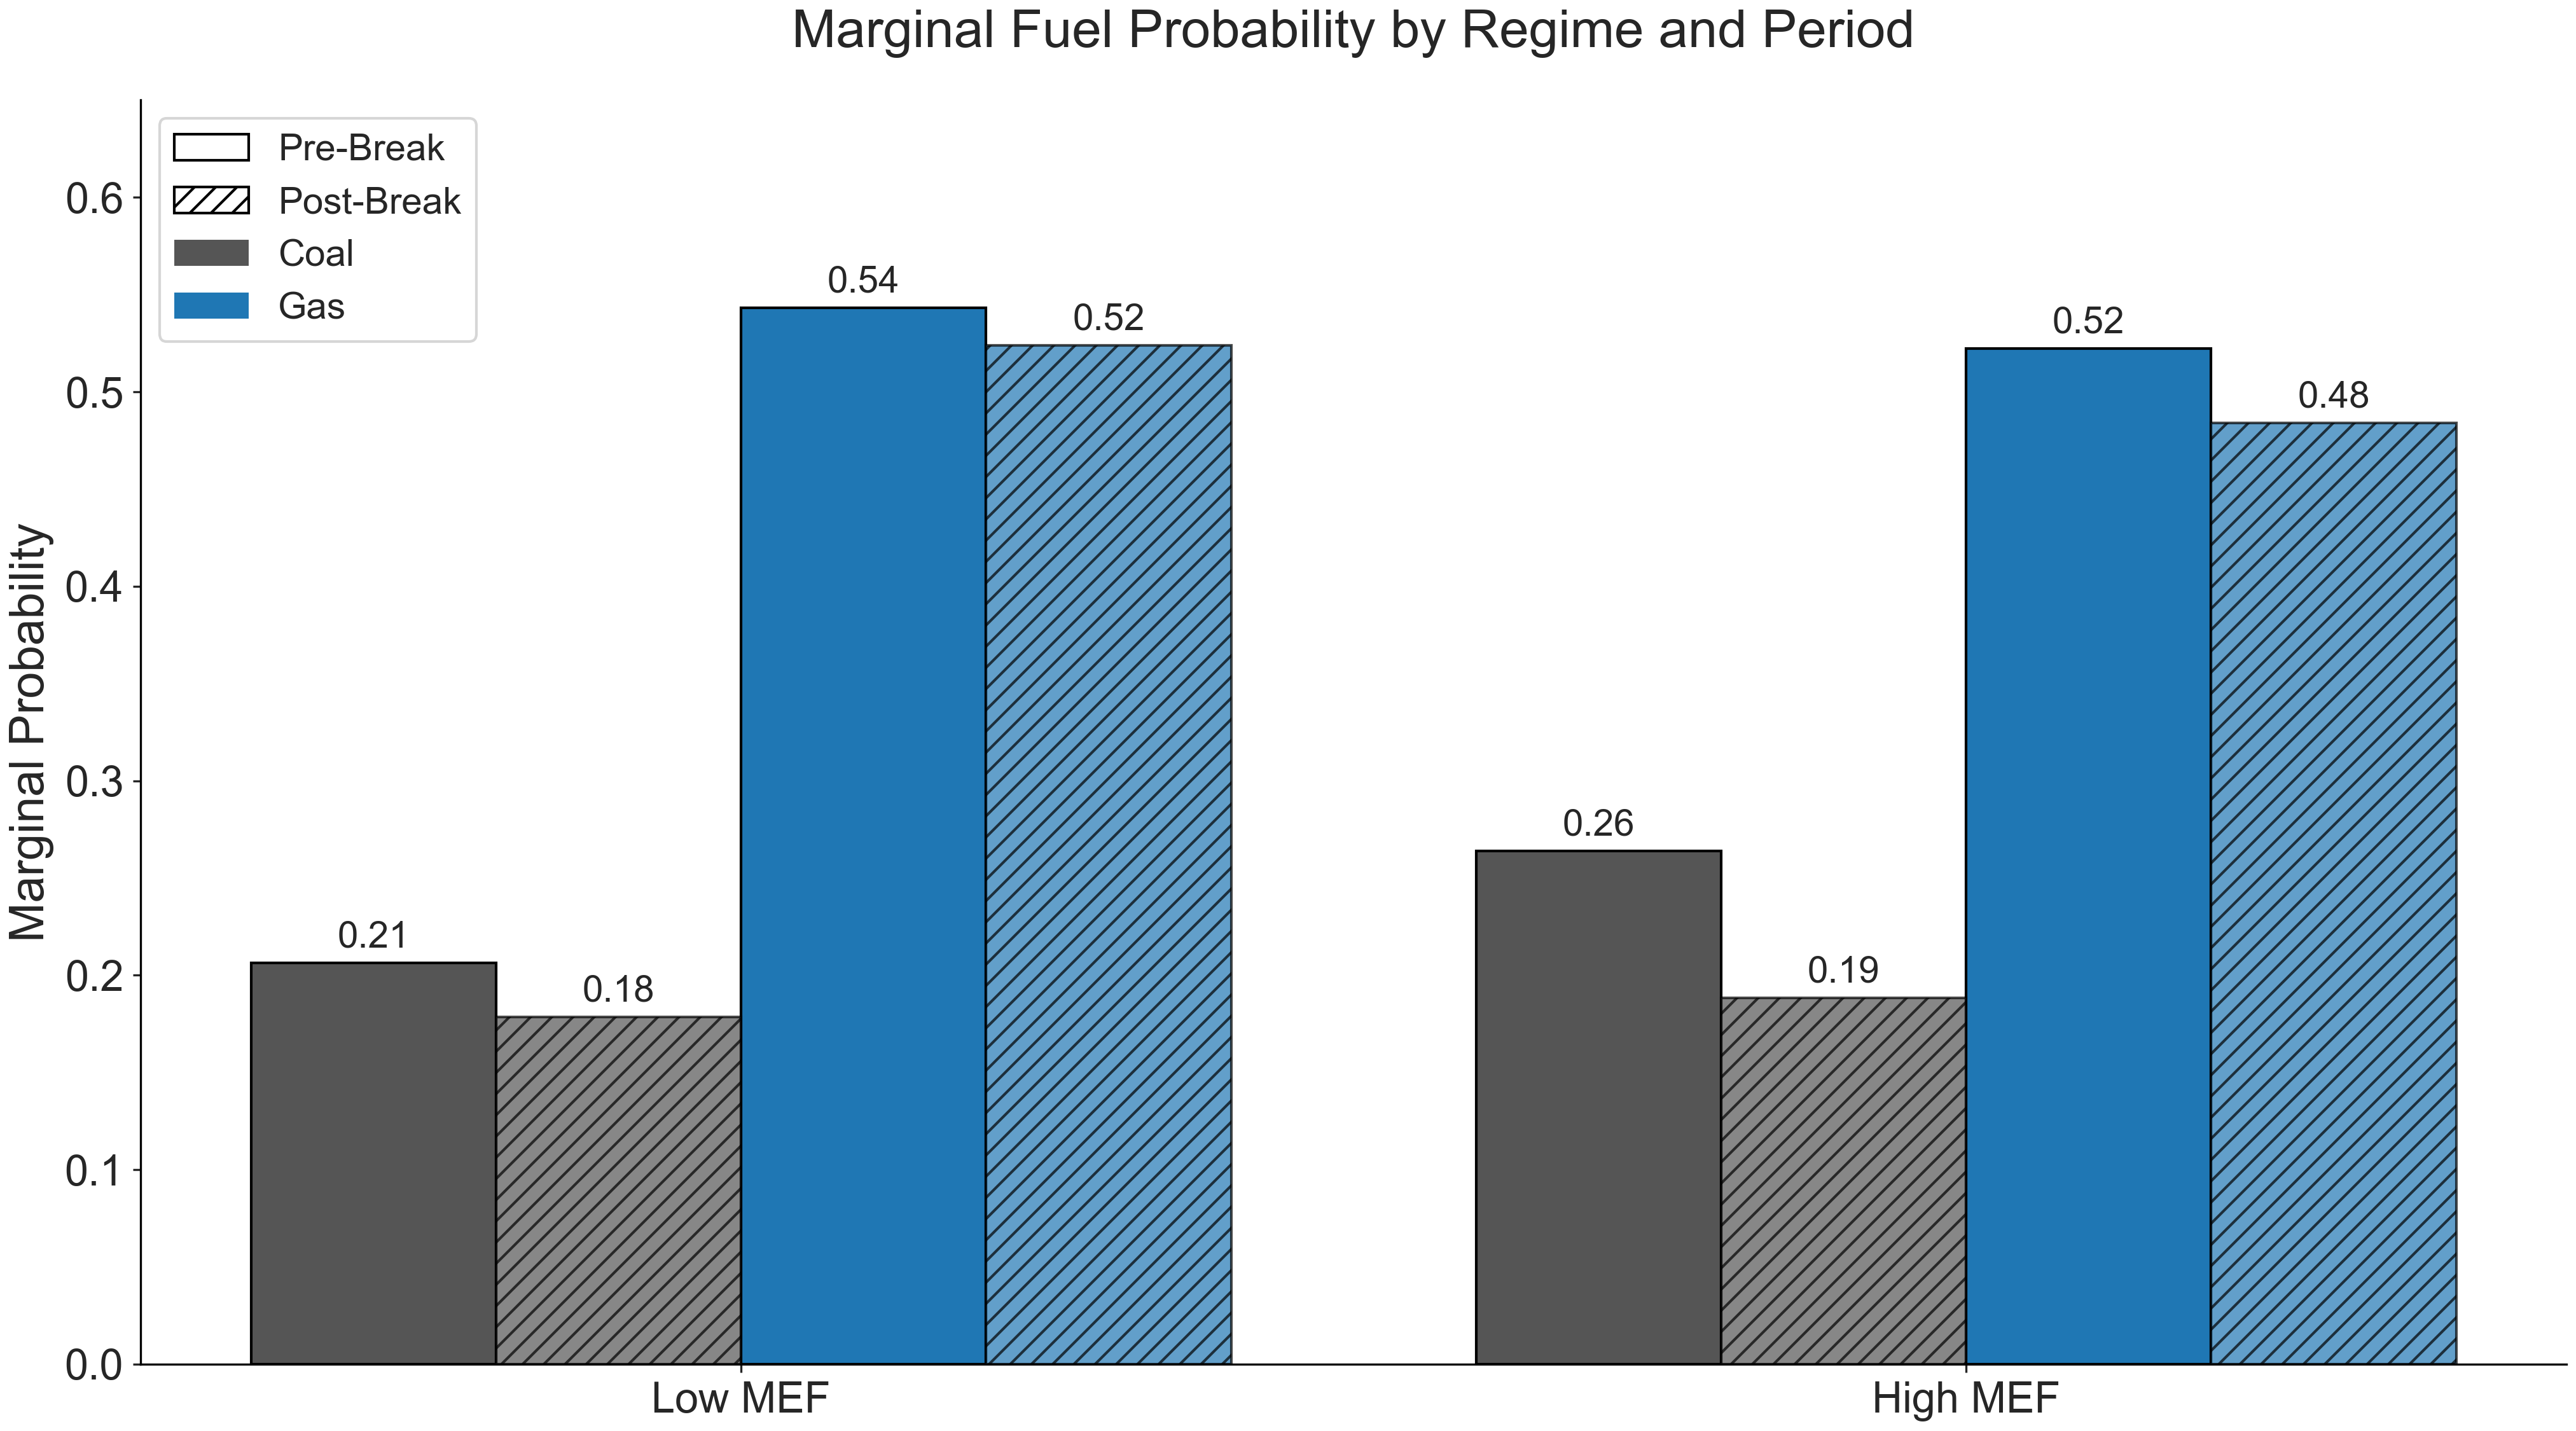

In [12]:
analysis.plot_regime_time_series()
analysis.analyze_marginal_fuel_probability_sb()

In [13]:
ms_results_hourly = analysis.fit_msm_hourly(n_jobs=-1)


🔄 Fitting Markov Switching Model...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  14 out of  48 | elapsed:   34.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  19 out of  48 | elapsed:   37.2s remaining:   56.9s
[Parallel(n_jobs=-1)]: Done  24 out of  48 | elapsed:   40.5s remaining:   40.5s
[Parallel(n_jobs=-1)]: Done  29 out of  48 | elapsed:   42.7s remaining:   27.9s
[Parallel(n_jobs=-1)]: Done  34 out of  48 | elapsed:   45.1s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  39 out of  48 | elapsed:   47.3s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  44 out of  48 | elapsed:   49.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   50.5s finished


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


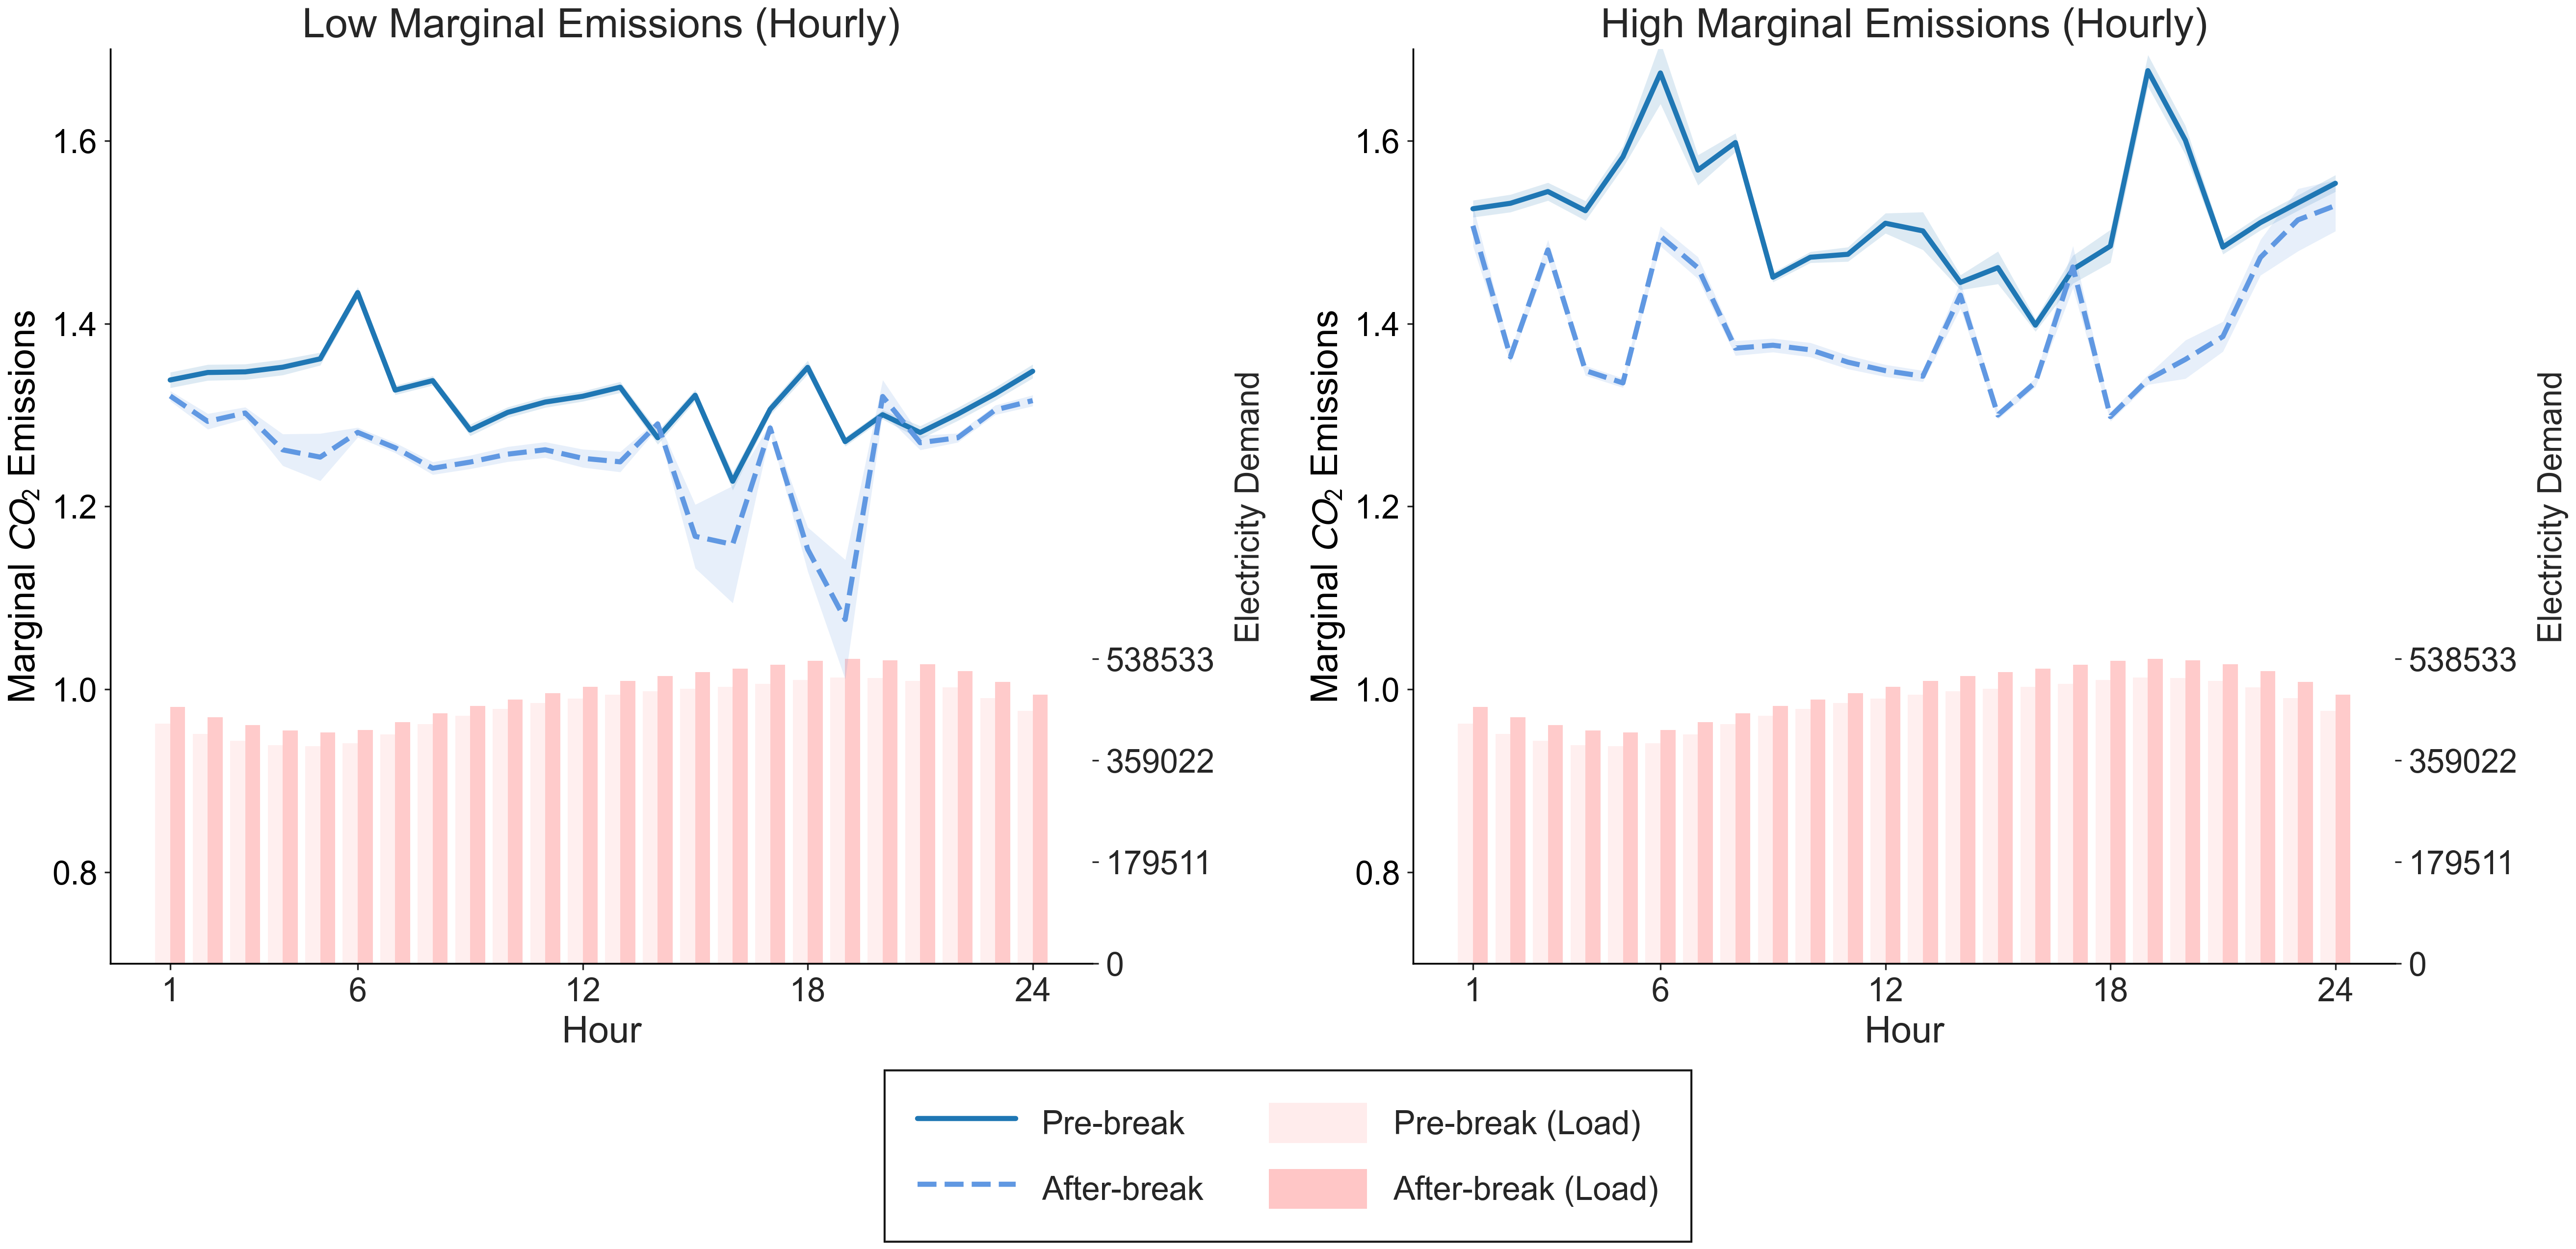

In [14]:
analysis.plot_mef_analysis_hourly(ms_results_hourly)

In [15]:
ms_results_hourly

hour       period  beta_low  beta_high    se_low   se_high   average_load
0      1    Pre-break  1.338282   1.525537  0.008496  0.009246  424110.138158
1      2    Pre-break  1.346480   1.531515  0.008699  0.009632  406299.254112
2      3    Pre-break  1.347190   1.544349  0.008514  0.009816  393565.106908
3      4    Pre-break  1.352253   1.523402  0.008552  0.010765  385951.011513
4      5    Pre-break  1.361417   1.582274  0.007022  0.011666  383879.377467
5      6    Pre-break  1.433851   1.674053  0.006194  0.033800  389642.125822
6      7    Pre-break  1.327231   1.567808  0.005131  0.016571  405185.314145
7      8    Pre-break  1.337588   1.597951  0.005125  0.010224  423206.160362
8      9    Pre-break  1.283554   1.450678  0.006345  0.005294  437960.201480
9     10    Pre-break  1.302830   1.472542  0.005858  0.006060  450007.522204
10    11    Pre-break  1.314137   1.475748  0.005949  0.007888  460178.449013
11    12    Pre-break  1.320472   1.509687  0.005558  0.011044  468584.465461
12    13    Pre-break  1.330379   1.501319  0.006077  0.020632  475399.074836
13    14    Pre-break  1.275130   1.444973  0.007248  0.008163  481029.484375
14    15    Pre-break  1.321576   1.461159  0.006167  0.017839  485504.506579
15    16    Pre-break  1.227540   1.398262  0.009666  0.006869  489412.038651
16    17    Pre-break  1.306248   1.459222  0.006295  0.015277  494437.236842
17    18    Pre-break  1.352094   1.484734  0.007490  0.017968  501134.472039
18    19    Pre-break  1.270888   1.676569  0.005051  0.017255  505446.183237
19    20    Pre-break  1.300300   1.600469  0.005062  0.015862  504602.163651
20    21    Pre-break  1.280861   1.483645  0.007166  0.007787  499788.983553
21    22    Pre-break  1.300945   1.510360  0.007156  0.008270  488481.076480
22    23    Pre-break  1.323111   1.531970  0.007146  0.008436  469167.145559
23    24    Pre-break  1.347835   1.553361  0.007549  0.009124  446454.261551
24     1  After-break  1.320821   1.506877  0.005594  0.022192  453236.073826
25     2  After-break  1.293003   1.363599  0.008535  0.006478  435206.397465
26     3  After-break  1.302199   1.480524  0.006430  0.011087  421262.709172
27     4  After-break  1.261900   1.348544  0.017324  0.005405  412064.066368
28     5  After-break  1.253933   1.335086  0.025874  0.005066  408762.428039
29     6  After-break  1.280992   1.495557  0.005406  0.010880  412993.156600
30     7  After-break  1.264138   1.460936  0.005492  0.011951  426562.345265
31     8  After-break  1.241783   1.373090  0.006956  0.008068  442358.268456
32     9  After-break  1.248523   1.376272  0.007360  0.007485  455218.780015
33    10  After-break  1.257178   1.371260  0.008226  0.007806  466616.188665
34    11  After-break  1.261972   1.357767  0.008576  0.007434  478027.604773
35    12  After-break  1.252649   1.348484  0.009904  0.006613  489054.802386
36    13  After-break  1.248787   1.342443  0.011094  0.006105  499262.148397
37    14  After-break  1.290241   1.430986  0.004632  0.014506  507971.507830
38    15  After-break  1.167318   1.299959  0.034792  0.004679  515008.859806
39    16  After-break  1.158495   1.335615  0.064067  0.004934  521204.304251
40    17  After-break  1.285806   1.461872  0.005093  0.023062  528022.472782
41    18  After-break  1.153149   1.298275  0.024075  0.005181  535362.698732
42    19  After-break  1.076398   1.338583  0.065345  0.005309  538533.433582
43    20  After-break  1.320253   1.360824  0.018093  0.021018  535941.328859
44    21  After-break  1.269711   1.385803  0.007892  0.016344  529126.640567
45    22  After-break  1.275078   1.472193  0.005008  0.019435  517168.774795
46    23  After-break  1.305506   1.513302  0.005196  0.034106  497975.366145
47    24  After-break  1.315763   1.529033  0.006014  0.027926  475368.822870

In [16]:
ms_results_hour_per_month = analysis.fit_msm_monthly(n_jobs=-1)


🔄 Fitting Markov Switching Model...
Total tasks for parallel execution: 576


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  2.4min finished


In [17]:
#find nans in ms_results_hour_per_month
#ms_results_hour_per_month.isnull().sum()
#find min and max of ms_results_hour_per_month
ms_results_hour_per_month.describe()

month        hour    beta_low      se_low   beta_high  \
count  575.000000  575.000000  575.000000  575.000000  575.000000   
mean     6.490435   12.480000    1.265019    0.061490    1.410582   
std      3.450420    6.917573    0.099216    0.155533    0.115059   
min      1.000000    1.000000    0.603296    0.009440    1.193734   
25%      3.500000    6.500000    1.225654    0.019570    1.323949   
50%      6.000000   12.000000    1.277337    0.026371    1.392223   
75%      9.000000   18.000000    1.327189    0.043418    1.475280   
max     12.000000   24.000000    1.446651    2.402477    1.968888   

            se_high   average_load  
count  5.740000e+02     575.000000  
mean   6.763599e-02  465815.906082  
std    1.961642e-01   68929.767805  
min    1.617214e-21  340651.569892  
25%    2.017787e-02  422865.554704  
50%    2.836415e-02  454501.145161  
75%    5.310560e-02  491622.754032  
max    3.085047e+00  678324.750000